<a href="https://colab.research.google.com/github/vanhau8562/AI-/blob/main/Nd_FACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/BT ca nhan/FACE

/content/drive/MyDrive/Colab Notebooks/BT ca nhan/FACE


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT ca nhan/FACE/train',target_size=(200,200), batch_size=32, class_mode='categorical')

Found 122 images belonging to 3 classes.


In [ ]:
# Tạo bộ dữ liệu validation
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT ca nhan/FACE/validation',target_size=(200,200), batch_size=32, class_mode='categorical')

Found 122 images belonging to 3 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Hoang': 0, 'Trieu': 1, 'hau': 2}

In [ ]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'Hoang': 0, 'Trieu': 1, 'hau': 2}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(200,200,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                    

In [32]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
4/4 [==============================] - 39s 10s/step - loss: 1.7102e-04 - accuracy: 1.0000 - val_loss: 9.3109 - val_accuracy: 0.7623
Epoch 2/100
4/4 [==============================] - 30s 8s/step - loss: 4.1017 - accuracy: 0.9016 - val_loss: 0.1442 - val_accuracy: 0.9918
Epoch 3/100
4/4 [==============================] - 30s 8s/step - loss: 0.2211 - accuracy: 0.9918 - val_loss: 1.0162e-07 - val_accuracy: 1.0000
Epoch 4/100
4/4 [==============================] - 31s 8s/step - loss: 0.0232 - accuracy: 0.9918 - val_loss: 2.8366e-05 - val_accuracy: 1.0000
Epoch 5/100
4/4 [==============================] - 34s 8s/step - loss: 1.7079e-06 - accuracy: 1.0000 - val_loss: 0.0795 - val_accuracy: 0.9836
Epoch 6/100
4/4 [==============================] - 30s 8s/step - loss: 0.5309 - accuracy: 0.9836 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 31s 8s/step - loss: 2.9216e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.000

In [33]:
# Lưu lại
model.save("nhan_dien_khuon_mat.h5")

In [34]:
# Tải mô hình 
model_CNN=load_model('nhan_dien_khuon_mat.h5')

In [35]:
# Đánh giá độ chính xác của mô hình 
Score=model_CNN.evaluate(training_set,verbose = 0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.04226991534233093
Train Accuracy 0.9918032884597778


<function matplotlib.pyplot.show(*args, **kw)>

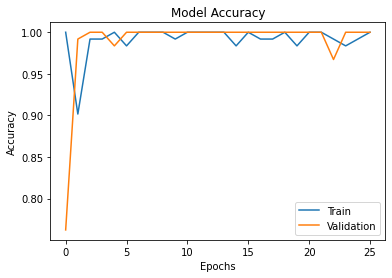

In [36]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7A009AD0>
1/1 [==============================] - 0s 274ms/step
Đây là: Trieu
Chu thich: Du lieu nam trong Test1


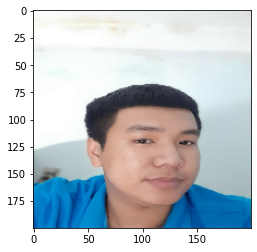

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7B3341D0>
1/1 [==============================] - 0s 63ms/step
Đây là: Trieu
Chu thich: Du lieu nam trong Test1


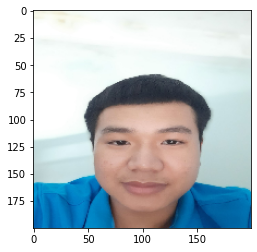

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7BB5E550>
1/1 [==============================] - 0s 58ms/step
Đây là: Trieu
Chu thich: Du lieu nam trong Test1


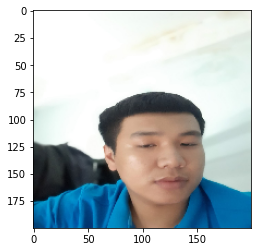

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7B2DD790>
1/1 [==============================] - 0s 62ms/step
Đây là: Trieu
Chu thich: Du lieu nam trong Test1


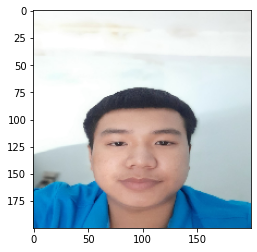

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7BB66BD0>
1/1 [==============================] - 0s 75ms/step
Đây là: Trieu
Chu thich: Du lieu nam trong Test1


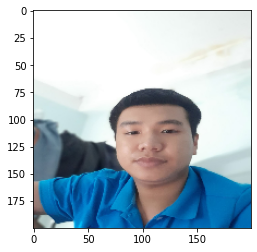

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7BB431D0>
1/1 [==============================] - 0s 60ms/step
Đây là: Trieu
Chu thich: Du lieu nam trong Test1


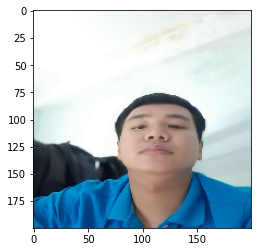

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7BAA8110>
1/1 [==============================] - 0s 63ms/step
Đây là: Trieu
Chu thich: Du lieu nam trong Test1


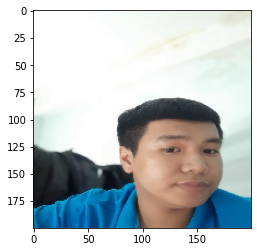

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7B8F87D0>
1/1 [==============================] - 0s 63ms/step
Đây là: Trieu
Chu thich: Du lieu nam trong Test1


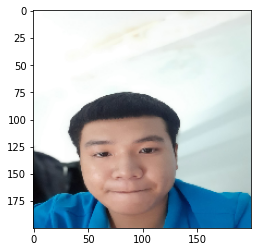

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7BAE9E90>
1/1 [==============================] - 0s 62ms/step
Đây là: Trieu
Chu thich: Du lieu nam trong Test1


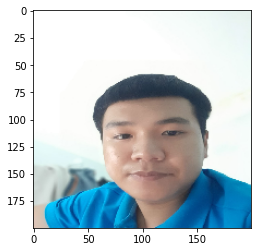

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7B900810>
1/1 [==============================] - 0s 64ms/step
Đây là: Trieu
Chu thich: Du lieu nam trong Test1


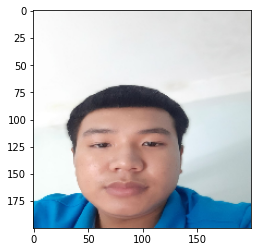

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7B877490>
1/1 [==============================] - 0s 72ms/step
Đây là: Trieu
Chu thich: Du lieu nam trong Test1


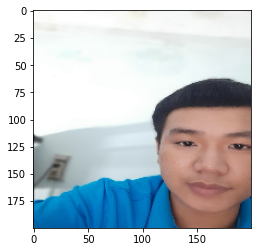

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7B857810>
1/1 [==============================] - 0s 61ms/step
Đây là: Trieu
Chu thich: Du lieu nam trong Test1


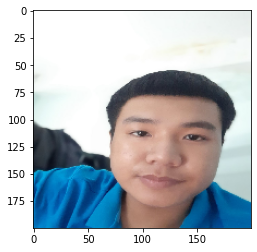

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7B866C10>
1/1 [==============================] - 0s 61ms/step
Đây là: Trieu
Chu thich: Du lieu nam trong Test1


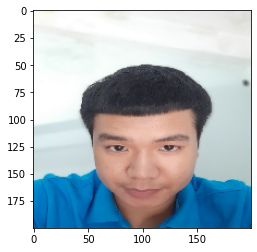

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7B728550>
1/1 [==============================] - 0s 60ms/step
Đây là: Trieu
Chu thich: Du lieu nam trong Test1


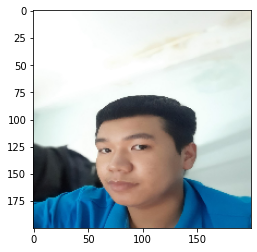

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7B819150>
1/1 [==============================] - 0s 66ms/step
Đây là: Trieu
Chu thich: Du lieu nam trong Test1


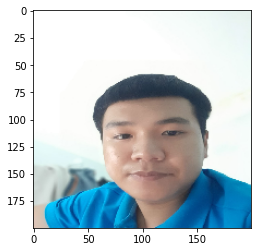

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7B760E10>
1/1 [==============================] - 0s 60ms/step
Đây là: Trieu
Chu thich: Du lieu nam trong Test1


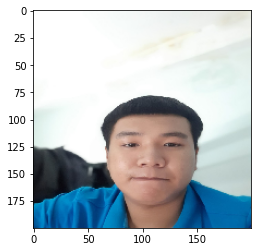

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7B709910>
1/1 [==============================] - 0s 59ms/step
Đây là: Trieu
Chu thich: Du lieu nam trong Test1


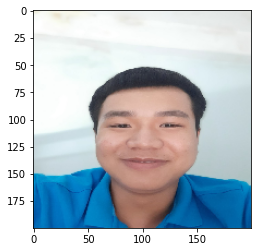

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7B4E2CD0>
1/1 [==============================] - 0s 59ms/step
Đây là: Trieu
Chu thich: Du lieu nam trong Test1


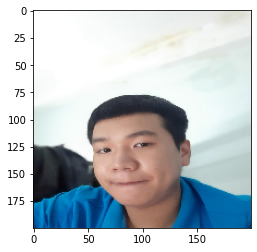

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7B5771D0>
1/1 [==============================] - 0s 60ms/step
Đây là: Trieu
Chu thich: Du lieu nam trong Test1


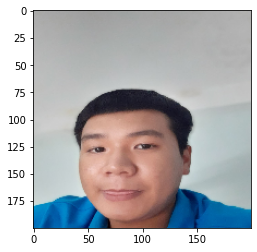

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7B59C890>
1/1 [==============================] - 0s 59ms/step
Đây là: Trieu
Chu thich: Du lieu nam trong Test1


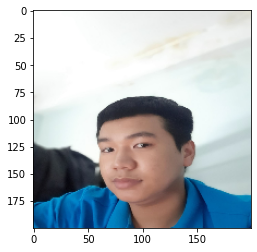

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7B5771D0>
1/1 [==============================] - 0s 58ms/step
Đây là: Hoang
Chu thich: Du lieu nam trong Test1


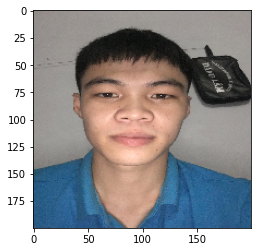

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7B3D70D0>
1/1 [==============================] - 0s 58ms/step
Đây là: Hoang
Chu thich: Du lieu nam trong Test1


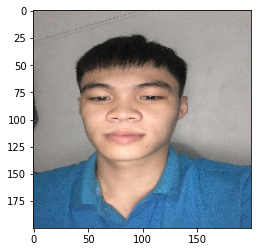

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC78249C10>
1/1 [==============================] - 0s 65ms/step
Đây là: Hoang
Chu thich: Du lieu nam trong Test1


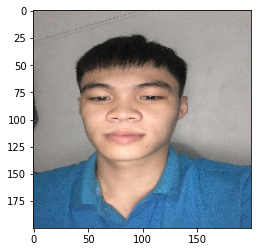

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7AAD1BD0>
1/1 [==============================] - 0s 61ms/step
Đây là: Hoang
Chu thich: Du lieu nam trong Test1


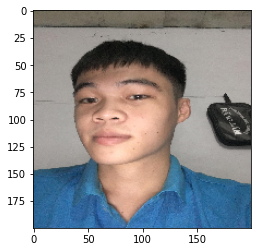

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7A009AD0>
1/1 [==============================] - 0s 62ms/step
Đây là: Hoang
Chu thich: Du lieu nam trong Test1


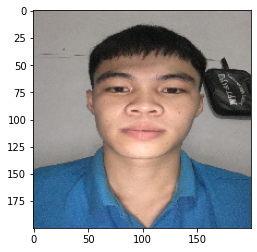

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7ADEC110>
1/1 [==============================] - 0s 74ms/step
Đây là: Hoang
Chu thich: Du lieu nam trong Test1


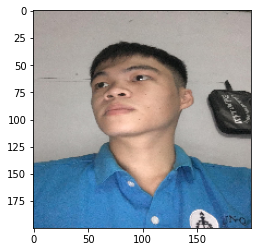

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDCF4556CD0>
1/1 [==============================] - 0s 63ms/step
Đây là: Hoang
Chu thich: Du lieu nam trong Test1


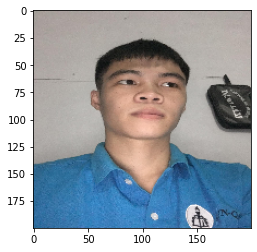

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7A204510>
1/1 [==============================] - 0s 59ms/step
Đây là: Hoang
Chu thich: Du lieu nam trong Test1


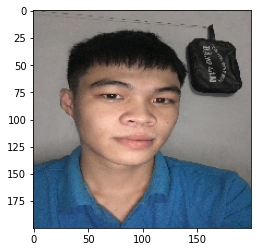

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7ACA5810>
1/1 [==============================] - 0s 61ms/step
Đây là: Hoang
Chu thich: Du lieu nam trong Test1


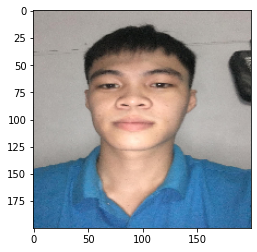

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7B312A50>
1/1 [==============================] - 0s 61ms/step
Đây là: Hoang
Chu thich: Du lieu nam trong Test1


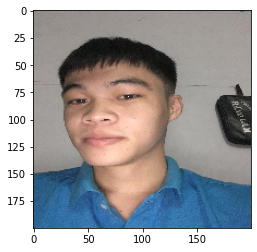

<PIL.Image.Image image mode=RGB size=200x200 at 0x7FDC7B478ED0>
1/1 [==============================] - 0s 57ms/step
Đây là: Hoang
Chu thich: Du lieu nam trong Test1


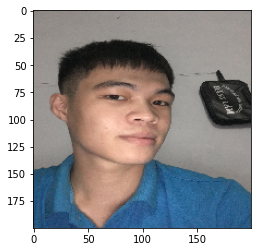

UnidentifiedImageError: ignored

In [37]:
test1="/content/drive/MyDrive/Colab Notebooks/BT ca nhan/FACE/test1"
test2="/content/drive/MyDrive/Colab Notebooks/BT ca nhan/FACE/test2"
test = [test1, test2]
stt = 0
for j in test:
  stt += 1
  for i in os.listdir(j):
    img=load_img(j+'/'+i,target_size=(200,200))
    print(img)
    plt.imshow(img)
    img=img_to_array(img)
    img=img.astype('float32')
    img=img/255
    img=np.expand_dims(img,axis=0)
    result=model_CNN.predict(img)
    if round(result[0][0])==1:
      prediction='Hoang'
    if round(result[0][1])==1:
      prediction='Trieu'
    if round(result[0][2])==1:
      prediction='hau'
    print('Đây là:',prediction)
    print(f'Chu thich: Du lieu nam trong Test{stt}')
    plt.show()